In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/ex2data1.txt',header=None)

In [5]:
dataset.columns = ["Test One","Test Two","Administration Decision"]

In [6]:
dataset.head()

,Test One,Test Two,Administration Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
dataset.describe()

,Test One,Test Two,Administration Decision
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Visualizing the Dataset

In [29]:
admitted = dataset.loc[dataset["Administration Decision"]==0]
not_admitted = dataset.loc[dataset["Administration Decision"]==1]

In [44]:
test_one_admitted = admitted.iloc[:,0]
test_one_not_admitted = not_admitted.iloc[:,0]

In [45]:
test_two_admitted = admitted.iloc[:,1]
test_two_not_admitted = not_admitted.iloc[:,1]

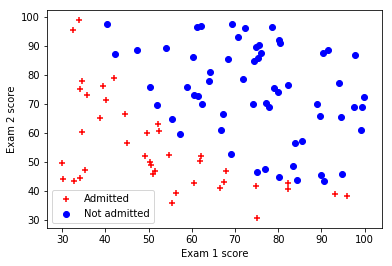

In [47]:
plt.scatter(test_one_admitted,test_two_admitted,c="r",marker="+")
plt.scatter(test_one_not_admitted,test_two_not_admitted,c="b",marker="o")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)